In [ ]:
!pip install librosa

In [1]:
import librosa
track_path = 'C:/Users/Achinthya/RealLifeDeceptionDetection.2016/Real-life_Deception_Detection_2016/Clips/Dataset/Deceptive wav/trial_lie_001.wav'
y,sr = librosa.load(track_path,sr=10000)
print(y)

[ 0.          0.          0.         ... -0.00027323  0.00031922
  0.        ]


In [2]:
len(y)

169867

In [3]:
# cut each song in pieces of 100.000 before doing anything else

def cut_track(track):
  start = 0
  end = len(track)
  
  track_pieces = []

  while start + 10000 < end:
    track_pieces.append(track[start:start+10000])

    start += 10000

  return track_pieces
x = cut_track(track_path)

In [4]:
def prepare_track(track_path):
  list_matrices = []
  y,sr = librosa.load(track_path,sr=22050)
  track_pieces = cut_track(y)
  for track_piece in track_pieces:
    melspect = librosa.feature.melspectrogram(track_piece)
    list_matrices.append(melspect)
  return list_matrices
prepare_track(track_path)

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.         0.         0.         ... 0.04385633 0.04152411 0.03988262] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.03918878 0.03729123 0.03665893 ... 0.03373447 0.02443952 0.0209892 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.01215388  0.00728973  0.00393789 ...  0.00177856  0.00061905
 -0.00057496] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00237906 -0.00503601 -0.00665875 ... -0.00282118 -0.0029327
 -0.0029973 ] as keyword ar

[array([[1.4168302e-04, 1.7406291e-01, 1.0838628e+00, ..., 2.6204747e-03,
         1.8475705e-03, 2.2828565e-03],
        [3.4976698e-04, 1.3822722e-01, 5.0364679e-01, ..., 1.4502377e-03,
         2.0035682e-03, 1.3310541e-03],
        [4.1362896e-04, 2.8552005e-02, 4.4870436e-02, ..., 1.5109607e-03,
         1.6421915e-03, 7.0596896e-03],
        ...,
        [3.0200503e-08, 1.5616090e-06, 2.8406605e-06, ..., 2.3309889e-05,
         1.5274411e-05, 3.5173776e-05],
        [8.5566541e-09, 6.0994847e-07, 1.1662837e-06, ..., 6.7933652e-06,
         7.3783517e-06, 3.1383723e-05],
        [1.2112352e-09, 6.2982025e-08, 1.2065361e-07, ..., 6.0202751e-07,
         1.1542513e-06, 2.6955127e-05]], dtype=float32),
 array([[6.50654593e-03, 8.02583713e-03, 5.78505592e-03, ...,
         1.12847015e-02, 1.07711032e-02, 4.83920425e-03],
        [9.43028927e-03, 4.87080310e-03, 1.82146311e-03, ...,
         5.43582533e-03, 5.48013300e-03, 5.15192002e-03],
        [8.22653435e-03, 3.98690905e-03, 3.481

In [5]:
# all tracks will be the X features and deceptive will be the target y
all_tracks = []
deceptive = []
truth = []
for i in range(1,61):
    if i<10:
        truth.append('trial_truth_00' + str(i) + '.wav')
    else:
        truth.append('trial_truth_0' + str(i) + '.wav')
print(truth)

['trial_truth_001.wav', 'trial_truth_002.wav', 'trial_truth_003.wav', 'trial_truth_004.wav', 'trial_truth_005.wav', 'trial_truth_006.wav', 'trial_truth_007.wav', 'trial_truth_008.wav', 'trial_truth_009.wav', 'trial_truth_010.wav', 'trial_truth_011.wav', 'trial_truth_012.wav', 'trial_truth_013.wav', 'trial_truth_014.wav', 'trial_truth_015.wav', 'trial_truth_016.wav', 'trial_truth_017.wav', 'trial_truth_018.wav', 'trial_truth_019.wav', 'trial_truth_020.wav', 'trial_truth_021.wav', 'trial_truth_022.wav', 'trial_truth_023.wav', 'trial_truth_024.wav', 'trial_truth_025.wav', 'trial_truth_026.wav', 'trial_truth_027.wav', 'trial_truth_028.wav', 'trial_truth_029.wav', 'trial_truth_030.wav', 'trial_truth_031.wav', 'trial_truth_032.wav', 'trial_truth_033.wav', 'trial_truth_034.wav', 'trial_truth_035.wav', 'trial_truth_036.wav', 'trial_truth_037.wav', 'trial_truth_038.wav', 'trial_truth_039.wav', 'trial_truth_040.wav', 'trial_truth_041.wav', 'trial_truth_042.wav', 'trial_truth_043.wav', 'trial_tru

In [6]:
# add all the songs that are in the truth folder
for track in truth:
   track_pieces = prepare_track('C:/Users/Achinthya/RealLifeDeceptionDetection.2016/Real-life_Deception_Detection_2016/Clips/Dataset/Truthful wav/' + track)
   all_tracks += track_pieces
   deceptive += ([1]*len(track_pieces))

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-1.3051817e-07  1.6417982e-07 -1.9964263e-07 ... -3.6383372e-02
 -3.7700959e-02 -3.7851024e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.03518446 -0.02330992 -0.01138742 ... -0.03218677 -0.02851193
 -0.0287147 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.03068241 -0.03436081 -0.03442284 ... -0.00675019 -0.01365155
 -0.0040125 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00927818 -0.004684    0.0011768  ...  0.03186605  0.027

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00741713 -0.00754696 -0.00268231 ...  0.01868453  0.01668991
  0.01764969] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.01800659  0.01711135  0.01854929 ... -0.04690017 -0.04898136
 -0.04805248] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.05013551 -0.05209277 -0.05318363 ...  0.00048608  0.00096151
  0.00195472] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.00367289  0.00479166  0.00528631 ... -0.00014339 -0.00044455
 -0.00078723

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00372595 -0.00369246 -0.00310979 ...  0.04514158  0.02791759
 -0.04892111] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 2.0996952e-02  4.2115126e-02 -4.0243907e-05 ...  1.0077675e-02
  8.9242086e-03  1.1901000e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.01112285  0.01647191  0.01423898 ... -0.06974514 -0.07508356
 -0.07857033] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.08357358 -0.0871664  -0.09448951 ... -0.01872376 -0.019

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.01904681 -0.01995043
 -0.01882763] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.01813595 -0.02004393 -0.02318238 ...  0.00486774  0.00401232
  0.00492162] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.00555481  0.00468689  0.00383119 ... -0.00321309 -0.00360382
 -0.00436781] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00462641 -0.00399025 -0.00383559 ...  0.00583075  0.00628096
  0.00822701

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.007404    0.00848156  0.00903355 ... -0.00539284 -0.00790629
 -0.00716765] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00424642 -0.00317154 -0.00458601 ...  0.03080737  0.02482191
  0.02044045] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.0143366  0.01027518 0.01113187 ... 0.03231776 0.03249439 0.03273393] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.03426754 0.03588999 0.03561839 ... 0.00790045 0.00803155 0.00770605] as keyword a

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.00201742 0.00157132 0.00098461 ... 0.02572304 0.02362358 0.02566643] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.03017506  0.03187374  0.02999999 ... -0.02784326 -0.00449741
  0.02268713] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.01708019 -0.00691499 -0.01133322 ... -0.0237762  -0.02227438
 -0.01731509] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.01847681 -0.02526002 -0.03050224 ... -0.05833935 -0.04921521
 -0.03961292] as ke

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.0028208  0.00550529 0.00866606 ... 0.01254602 0.01199308 0.01141103] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.01294519 0.01332468 0.01049604 ... 0.00467628 0.00746466 0.00927741] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.00925389  0.00882165  0.00957398 ... -0.00474609  0.00055193
  0.01200562] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.01384932  0.00426353 -0.00206696 ... -0.0053177  -0.0019698
  0.00176089] as keyword ar

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.00155341  0.0005803  -0.0003331  ... -0.00327737 -0.0033815
 -0.00237504] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00096484 -0.00061617 -0.00163944 ...  0.00052401  0.00130682
  0.00147796] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.00083142  0.00045376  0.00061373 ... -0.00595572  0.00213765
  0.00627301] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.00565741 0.00537778 0.01006246 ... 0.007133   0.00616505 0.00664082] as key

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00241512 -0.00782636 -0.00958453 ... -0.01339309 -0.01677408
 -0.02001974] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.02285909 -0.02543861 -0.02707895 ... -0.00222833 -0.00354087
 -0.00533874] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-5.5061774e-03 -3.9957310e-03 -3.0920468e-03 ... -1.1717303e-03
  3.1267066e-04  1.0215272e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00899304 -0.010

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 2.5021809e-03  2.7350537e-03  2.8164329e-03 ...  4.4343727e-05
 -1.6551020e-04  2.9506540e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 4.2150039e-04  8.7871682e-05 -2.7775575e-04 ... -6.4242241e-04
 -4.6478183e-04 -2.7951706e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00046023 -0.00094553 -0.00107841 ... -0.01540366 -0.01779358
 -0.02184078] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.02801813 -0.03383258 -0.03761692 ... 

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.00246205  0.00202542  0.00333633 ...  0.01031543 -0.03806217
 -0.04307184] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.01982703 -0.00086088  0.00700154 ... -0.00155662  0.00403241
  0.01215858] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.02111345 0.0283176  0.03381606 ... 0.0036356  0.00282618 0.00194028] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.00141551 -0.00029948 -0.00250291 ... -0.00456222 -0.00352708
 -0.0027849 ] as ke

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-9.4553761e-05  8.3761597e-03  1.1440331e-02 ... -8.5955271e-03
 -1.0837070e-02 -1.3442436e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.01625994 -0.01905601 -0.02149629 ...  0.05440027  0.05035182
  0.04675843] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.04395527 0.04185437 0.04012805 ... 0.01045895 0.01426753 0.01666162] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.01640945  0.01458857  0.01323435 ... -0.00361563 -0.00905305
 

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.         0.         0.         ... 0.00496296 0.00429721 0.00464611] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.00539691  0.00543155  0.00495296 ... -0.00045631 -0.00056727
 -0.00076278] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-6.0624030e-04 -1.5743403e-04  5.0510949e-05 ... -2.2197993e-02
 -2.0442691e-02 -1.7296195e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.01192952 -0.00570834 -0.00157821 ... -0.00188824 -0.00022164
 

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 4.1461787e-03  4.4716559e-03  4.7438513e-03 ...  1.6460409e-04
 -8.6369328e-05  6.5322679e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.00050778  0.00080523  0.000488   ... -0.00558111 -0.00644981
 -0.00681171] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00598949 -0.00475814 -0.00434429 ...  0.0019819   0.00182713
  0.00142499] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.00079544  0.00056675  0.00112527 ... -0.01249122 -0.011

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 6.9379294e-04  1.1833496e-04  5.2579981e-05 ... -2.7102921e-03
 -2.8546746e-03 -3.9554620e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00524342 -0.0057958  -0.0055858  ...  0.00132384  0.00130031
  0.00125248] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.00116182  0.00183799  0.00374031 ... -0.00365836 -0.00454072
 -0.00294173] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.00413981 0.01368591 0.02014242 ... 0.0350379  0.04310779

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.00184409 0.00424633 0.00449496 ... 0.00457856 0.01107337 0.01303671] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 1.1115946e-02  6.9664265e-03 -5.9486560e-05 ...  3.2387953e-02
  4.0664420e-02  4.5346223e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.04811359  0.0479588   0.04458107 ... -0.0083954  -0.00733064
 -0.00685818] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00709709 -0.00746508 -0.00769122 ... -0.00288909 -0.00336466
 

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.00303928 0.00335945 0.00186112 ... 0.07856045 0.07856318 0.07752481] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.07529472 0.07127193 0.0645087  ... 0.05270508 0.05920136 0.06694491] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.06485641  0.05668992  0.0505123  ... -0.00279849 -0.00279676
 -0.00286135] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00254913 -0.00204585 -0.00157333 ... -0.00134834 -0.00068025
 -0.00039017] as keyword a

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00509015 -0.00656285 -0.00761313 ... -0.01110339 -0.01076435
 -0.01155814] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.01175935 -0.01102405 -0.00840487 ...  0.00956235  0.01097866
  0.01292279] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.0152278   0.01752643  0.02023904 ... -0.00624818 -0.00579935
 -0.0057991 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00557943 -0.00502311 -0.00384988 ...  0.0020953   0.00103556
 -0.00089583

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.00291525  0.00186352  0.00102781 ... -0.0008543  -0.00210351
 -0.00341428] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00475128 -0.006354   -0.00781585 ...  0.01029229  0.01013431
  0.0100884 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 1.0100296e-02  1.0241654e-02  1.0448175e-02 ... -3.1518070e-05
 -2.5939051e-04 -3.4699822e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00016683 -0.00038421 -0.00055029 ...  0.01637642  0.019

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.02102827  0.02146679  0.02002707 ... -0.00709023 -0.00706625
 -0.00720793] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00805502 -0.00828636 -0.00816088 ...  0.00499397  0.00461297
  0.00328092] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.0020083  0.00195075 0.00294781 ... 0.01296973 0.01335301 0.0122262 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.00993429 0.00704272 0.00449728 ... 0.00098435 0.00074855 0.00035704] as keyword a

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.01585525  0.01861824  0.02201657 ... -0.00800915 -0.00804236
 -0.0077282 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00781582 -0.00732813 -0.00660038 ... -0.01187536 -0.01513587
 -0.01840596] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.02191149 -0.02475214 -0.02686083 ...  0.00976045  0.01055159
  0.01018402] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.00813383 0.00628529 0.00712454 ... 0.00123072 0.00166515 0.00215694] as ke

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.02565881 -0.02798637 -0.03328926 ... -0.00792556 -0.00689728
 -0.00251373] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.0012209  -0.00156137 -0.00170276 ... -0.00401233 -0.00528587
 -0.00601082] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00702717 -0.00794307 -0.0093724  ... -0.01036175 -0.00885393
 -0.00813614] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00815236 -0.00773136 -0.00862732 ... -0.03571134 -0.03963298
 -0.03949016

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.01168445 -0.01119144 -0.01079974 ... -0.00457041 -0.00543165
 -0.00600466] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-6.1260280e-03 -6.7373104e-03 -7.4604228e-03 ... -1.2919829e-04
  8.5408959e-05  3.9846727e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 4.0039199e-04  2.2910275e-04  3.5441494e-06 ... -9.8861242e-03
 -1.0442162e-02 -9.9373171e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.01170205 -0.01508511 -0.01844145 ... 

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-2.4572710e-04 -2.1940211e-03 -3.6609974e-03 ... -6.1096078e-05
 -2.6192694e-04 -1.5077926e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00274109 -0.0029187  -0.00325844 ... -0.00109991 -0.00115392
 -0.00074907] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.0007128  -0.00111713 -0.00066174 ...  0.01012186  0.00625572
  0.00122852] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00226365 -0.00554114 -0.00766596 ...  0.03720526  0.037

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00791004  0.0005045   0.00943701 ... -0.00528337 -0.0071093
 -0.004162  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00187677 -0.0010455  -0.00370175 ... -0.00456335 -0.010788
 -0.01722621] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.0226257  -0.02733067 -0.0309996  ... -0.02251632 -0.01576046
 -0.01465119] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.01420757 -0.00903119 -0.0068394  ... -0.0326742  -0.03262673
 -0.03250799] a

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00207661 -0.00244012 -0.00222339 ... -0.00016815 -0.00053291
  0.00342014] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.00347913  0.00027965 -0.00083916 ...  0.00075719 -0.00099299
 -0.00223629] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00162922 -0.00232045 -0.00289925 ... -0.00816806 -0.00670262
 -0.00587613] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00518955 -0.00452704 -0.00594827 ...  0.00245581 -0.00399224
 -0.00315654

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.01159588  0.01266706  0.01434639 ... -0.00512724 -0.0046918
 -0.00437197] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00424644 -0.0041866  -0.00497192 ... -0.04061061 -0.0450423
 -0.04654502] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.0442226  -0.04046226 -0.03465473 ... -0.00214389 -0.00679882
 -0.00185942] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.00835003  0.00700096  0.00096847 ... -0.00569854 -0.00762056
 -0.00898876] 

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00953775 -0.00098782  0.00703908 ...  0.00772591  0.0148315
  0.02151002] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.02477194 0.02375585 0.01918205 ... 0.02619633 0.02140136 0.0152234 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.00890343  0.00299419 -0.00337166 ... -0.00103461 -0.00113358
 -0.00127382] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00128835 -0.00123324 -0.00107133 ...  0.00119489  0.00098091
  0.00087161] as key

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.0328026   0.03405241  0.03380641 ... -0.00027851 -0.00010396
  0.00039763] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 3.3763156e-04 -5.9595441e-05  6.0128176e-04 ...  9.6736969e-03
  1.8300250e-02  1.9263130e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.01739685  0.01731318  0.02206283 ... -0.00896315 -0.00900895
 -0.00891074] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-8.5581979e-03 -8.7292632e-03 -8.7163663e-03 ...  4.328861

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00061286 -0.00071772 -0.00019494 ... -0.00057768 -0.00054549
 -0.00064457] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00068337 -0.00063883 -0.00092841 ... -0.00141219 -0.0013204
 -0.00129516] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00137776 -0.00150905 -0.00163868 ... -0.00732371 -0.00576331
 -0.00462468] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00491315 -0.00638255 -0.00591037 ... -0.01167193 -0.01475255
 -0.01627929]

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.0023458  -0.0014725  -0.00239818 ...  0.00013036 -0.00024917
 -0.0007858 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00117679 -0.00197131 -0.0024351  ...  0.01494657  0.01173469
  0.01019466] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.00954834 0.00827905 0.0097506  ... 0.01061613 0.01223269 0.01368937] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 1.5016750e-02  1.6053861e-02  1.6466198e-02 ... -5.6915447e-05
 -7.4063122e-05 -4.

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.00194061  0.00143797  0.00146396 ... -0.00794389 -0.01236548
 -0.0154215 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.01572031 -0.01378452 -0.0103825  ... -0.0107286  -0.00673901
 -0.00395154] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.00221443  0.0015726  -0.00092071 ...  0.00834231  0.00886247
  0.00895828] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.00864259  0.00753419  0.00725048 ... -0.00487335 -0.00461039
 -0.00396777

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.         0.         0.         ... 0.00022424 0.00142839 0.00144757] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 6.3414179e-04  1.7063216e-03  1.5103098e-03 ... -5.1185609e-05
  7.3925912e-05 -1.0656543e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-9.5676631e-05 -4.1149451e-05  1.0420157e-03 ...  2.6774300e-02
  2.4766374e-02  2.3342641e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.02097359  0.01767431  0.01065095 ... -0.0574

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00456035 -0.02065592
 -0.01612293] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00770537 -0.00642921 -0.00697936 ...  0.00387536  0.00437516
  0.00485195] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.00341719  0.00204616  0.00415328 ...  0.01001837  0.00479472
 -0.00028137] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.00098743 -0.00644705 -0.00808434 ... -0.05117507 -0.06306742
 -0.056646  

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.         0.         0.         ... 0.01201775 0.01327994 0.01015153] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.012722   0.00892029 0.01271041 ... 0.01990188 0.05363801 0.07272153] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.05980869 0.03568499 0.0143537  ... 0.22648485 0.21306832 0.20176886] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.19396897 0.1649211  0.13413538 ... 0.08598715 0.06137765 0.05290284] as keyword args. From vers

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.00993899  0.00772693  0.00642944 ... -0.00985498 -0.01139776
 -0.01205563] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.01160253 -0.01182221 -0.01101931 ...  0.01746672  0.02307352
  0.0272901 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.02693046 0.0286555  0.03369426 ... 0.00749976 0.00910574 0.00803645] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.01302892  0.00910207  0.01086923 ...  0.00660307  0.005508
 -0.00389299] as keyw

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00391226 -0.00619692 -0.00645893 ... -0.00058161 -0.0008679
 -0.00070246] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00064924 -0.0005294  -0.00035486 ...  0.0106553   0.00919522
  0.00866107] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.00545874  0.00331767 -0.00059733 ... -0.00097856 -0.00097267
 -0.0009795 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00105154 -0.00091102 -0.00074683 ...  0.00865703  0.00758222
  0.00596675]

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00274451 -0.00203307 -0.00255512 ...  0.01462274  0.01393405
  0.01381353] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.01399044  0.01296365  0.01102511 ... -0.0221205  -0.01982741
 -0.01764509] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.01573414 -0.01373374 -0.01304867 ... -0.00421172 -0.00063364
  0.00201102] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00077061 -0.00244391 -0.00685442 ... -0.00041389  0.00119351
  0.00055998

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.00287476  0.00170847  0.00147717 ... -0.00022721 -0.0006236
  0.00095872] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.00252752 0.00173527 0.00379814 ... 0.02642711 0.02682405 0.02787948] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.02724816  0.02806131  0.02800256 ... -0.03045227 -0.03231898
 -0.03162429] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.02951282 -0.02759531 -0.02194748 ... -0.00080682 -0.00066888
 -0.00159177] as key

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.00852536 0.0184664  0.02889067 ... 0.00559363 0.00435999 0.00573724] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.00861698 0.00974278 0.01193396 ... 0.00193785 0.0017232  0.00317113] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.00435045  0.00238028  0.00369811 ... -0.00766458 -0.00708877
 -0.00697978] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00770319 -0.00823616 -0.00926342 ...  0.00119898  0.0005802
  0.00063739] as keyword ar

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00165531 -0.00874529 -0.01061647 ...  0.00263426  0.00362389
 -0.00044129] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00130789 -0.00144411 -0.00247855 ...  0.05545679  0.0232135
  0.00373233] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.0231217   0.05943706  0.03312551 ... -0.00498026 -0.00515809
 -0.00012321] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.00259254  0.01043699  0.01742798 ...  0.02169902 -0.02217494
 -0.05434731]

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.01095401  0.01201584  0.01251285 ... -0.0071323  -0.00726605
 -0.0058802 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00390775 -0.00244776 -0.00141583 ...  0.00950249  0.00987411
  0.01182615] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.01226251 0.01079    0.01315595 ... 0.00027245 0.00165805 0.00041642] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.00461493  0.00240866  0.00227122 ...  0.00775805  0.00081079
 -0.00415495] as ke

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-8.9667246e-08  8.3091152e-08 -7.0834112e-08 ...  5.5039503e-02
  9.0506330e-02  1.2799866e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.12284244  0.0931653   0.0572255  ... -0.00442108 -0.00165659
 -0.0025992 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00540237 -0.00673103 -0.0065786  ...  0.06973569  0.07662226
  0.08386144] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.08863034 0.09119361 0.08632493 ... 0.07469627 0.0765028 

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.00379346 0.01169459 0.02122905 ... 0.02880258 0.02020033 0.01774186] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.00818053  0.00349606 -0.00940652 ...  0.00407718  0.00428065
  0.00415138] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.00397629 0.0051099  0.00831037 ... 0.03068781 0.04283565 0.04782707] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.05598835 0.06476868 0.07330155 ... 0.00474053 0.00636713 0.00909067] as keyword args. Fr

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 1.09712884e-04  5.30602003e-04  9.44548403e-04 ...  6.24784008e-02
 -1.12800868e-02  1.39824763e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.2995845   0.2915271   0.01963448 ... -0.75246173 -0.7333306
 -0.7900978 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.87974846 -0.930222   -0.8995053  ... -0.59117055 -0.6479374
 -0.6976045 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.74258906 -0.78183925 -0.8128543  ... -0.2905732  -0

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.35338038 -0.3174186  -0.12210051 ... -0.06145956 -0.05648819
 -0.04569707] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.04056836 -0.04444468 -0.05036834 ... -0.12695606 -0.13050121
 -0.13420773] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.13898022 -0.1437122  -0.14778021 ...  0.28548375  0.42803356
  0.05198848] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.29373553 -0.08806241  0.36831993 ...  0.7816621   0.7925476
  0.769891  ]

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.09499005 -0.04639761  0.03209329 ... -0.00724513 -0.01639163
 -0.02214984] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.02696324 -0.02870852 -0.02862217 ...  0.00944343  0.00912577
  0.00970447] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.00976036 0.00969329 0.00935374 ... 0.00376097 0.00435924 0.00406457] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.00406259 0.00330906 0.00362214 ... 0.00449486 0.00552207 0.00469743] as keyword a

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.00172233  0.00137361  0.00075667 ... -0.01414834 -0.01436816
 -0.01402792] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.01676709 -0.01989401 -0.01825868 ...  0.00632841  0.00612525
  0.00693806] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.00932024 0.00950676 0.00885433 ... 0.01351184 0.00651814 0.00482091] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.00665714  0.0099118   0.00659698 ... -0.02820615 -0.02369923
 -0.01283174] as ke

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.         0.         0.         ... 0.4423337  0.48775843 0.53289276] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.5847844   0.63918144  0.690099   ... -0.15507527 -0.19466066
 -0.22682983] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.22912215 -0.24095857 -0.28090492 ...  0.43022844  0.36685747
  0.36219206] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.3449842  0.26896182 0.22826976 ... 0.11618613 0.11302223 0.11443403] as keyword a

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[9.2162962e-05 4.2083845e-04 7.4519916e-04 ... 9.7742075e-01 9.8056567e-01
 9.8226333e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.9849849   0.98884064  0.9960545  ... -0.50919867 -0.4443041
 -0.4146517 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.46382973 -0.5339044  -0.5774117  ... -0.9114664  -0.92357385
 -0.93260396] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.9352944  -0.93166953 -0.92223567 ...  0.0775982   0.08723447
 

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.11183231 -0.10691592 -0.11031999 ... -0.18837434 -0.1452306
 -0.03530767] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.11199888 -0.12530898 -0.02340894 ... -0.02056505 -0.03300417
 -0.04326082] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00228739  0.04779704  0.05019492 ... -0.12878814 -0.12345786
 -0.125509  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.13562071 -0.15354985 -0.17782223 ...  0.6865743   0.66253006
  0.6383378 ]

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-5.5599620e-04 -2.6202323e-03 -4.7791288e-03 ... -5.5153757e-01
 -5.9871674e-01 -6.4492977e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.7076815  -0.7881384  -0.8559033  ...  0.9999946   0.99993414
  1.0000172 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.9999033   1.0000597   0.99984384 ... -0.0430049  -0.0202806
 -0.00738142] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.01758106 -0.00245718  0.00281783 ...  0.00045855 -0.0010

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.         0.         0.         ... 0.13748887 0.1427154  0.14753628] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.15134181  0.15469569  0.15771632 ... -0.08698285 -0.08162236
 -0.07941287] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.07801177 -0.07475104 -0.07171573 ...  0.31102538  0.27274984
  0.26134735] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.27011245  0.2574092   0.20416024 ... -0.7798455  -0.74297875
 -0.6863134 ] as ke

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.04737208 0.04455131 0.04280539 ... 0.9400392  0.9431517  0.94383967] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.94074184  0.9345459   0.93137074 ... -0.40172178 -0.42756903
 -0.49382704] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.53311455 -0.5619838  -0.6285967  ... -0.99208474 -0.9583557
 -0.90951586] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.862249   -0.8123073  -0.76002616 ... -0.52109486 -0.6342485
 -0.76720303] as keyw

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 8.0802401e-08 -1.2827749e-07  1.8600218e-07 ... -1.8288718e-04
  4.6592031e-05  5.0588942e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.00019177 -0.000786   -0.00112033 ...  0.03063052  0.03089774
  0.0312134 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.0313882   0.03139881  0.03124851 ... -0.01372456 -0.01400396
 -0.01464397] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.01550814 -0.01678028 -0.01843577 ... -0.00104881 -0.001

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.01492577 -0.01859573 -0.02413527 ... -0.00681852 -0.00688705
 -0.00683729] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00677606 -0.00668903 -0.00669014 ... -0.00034122 -0.0003303
 -0.00025224] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-9.3404065e-05 -5.6113146e-07 -4.1825886e-05 ... -2.7854543e-04
 -2.8044422e-04 -2.5053634e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00025137 -0.00023311 -0.00020886 ...  0.00103638  0.0005

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 1.4691871e-04 -5.6572255e-05 -1.3903998e-04 ...  4.7116796e-03
  5.2130977e-03  5.6191445e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.00574501  0.00553157  0.00533174 ... -0.00540414 -0.00311631
  0.00149747] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.00854786 0.01685014 0.02447934 ... 0.00286312 0.00291851 0.00243904] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.001875   0.00185086 0.00250873 ... 0.00493872 0.00588785 0.0068

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.00263093  0.00243076  0.00256458 ... -0.00127901 -0.00131836
 -0.00139769] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00155361 -0.0017405  -0.0018254  ... -0.00344582 -0.00459974
 -0.00538513] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00563335 -0.00580911 -0.00602925 ...  0.04022631  0.03268476
  0.02628692] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.02214901 0.02058189 0.02146607 ... 0.00206369 0.00189645 0.00180205] as ke

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.02210115  0.01864814  0.01887985 ... -0.01611044 -0.01469214
 -0.01117507] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.0096223  -0.0106367  -0.01280782 ...  0.00762882  0.00780828
  0.00924014] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.0112275   0.01187147  0.01330898 ... -0.00086229 -0.00051435
  0.00098934] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-2.47928183e-05 -1.21353594e-04 -2.24223331e-04 ... -9.82745513e-02
 -8.6053

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.01740065 -0.01925609
 -0.01898645] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.02038188 -0.01924622 -0.0187547  ... -0.13525602 -0.13510007
 -0.1335385 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.13253248 -0.1312343  -0.13026303 ... -0.09161304 -0.10152689
 -0.09887931] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.08513424 -0.07429998 -0.06851347 ... -0.23601075 -0.26319256
 -0.2801146 

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.10387798  0.10637589  0.11100291 ... -0.17194076 -0.15263857
 -0.14151214] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.13499247 -0.1301773  -0.1210725  ...  0.07420331  0.08255284
  0.08115926] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.07603693 0.07329999 0.0784177  ... 0.16505845 0.16022317 0.16654044] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.18595295 0.20614953 0.23199695 ... 0.02278585 0.02172432 0.01869125] as keyword a

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.00399874  0.00242156  0.00242964 ... -0.00587424 -0.00537702
 -0.00509461] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00497335 -0.00465932 -0.00249925 ... -0.00876892 -0.00767078
 -0.00702729] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00617952 -0.00472221 -0.00257782 ... -0.0019876  -0.0013527
 -0.0008493 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00058624  0.00048681  0.00144314 ...  0.01972807  0.0201041
  0.02212227] 

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.00930776  0.01165471  0.01613554 ... -0.01794097 -0.01646131
 -0.01670992] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.01448472 -0.00936228 -0.00711681 ...  0.00125823  0.00221015
  0.00185269] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.00281584  0.00396857  0.00439502 ... -0.00367734 -0.00364441
 -0.00426447] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00468214 -0.00513356 -0.00581135 ... -0.01597893 -0.01913329
 -0.02162818

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.0172935  -0.03516394
  0.0092737 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.04897149  0.03823052 -0.01566782 ... -0.00830871 -0.0082349
 -0.00846716] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00669738 -0.00685633 -0.00967205 ...  0.00624778  0.00470988
  0.00437422] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.00560104  0.00628898  0.00455724 ...  0.00601845  0.00212682
 -0.00109499]

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.05385485 -0.02102291 -0.08619691 ... -0.00306059 -0.00050895
  0.00062873] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00115594 -0.00255694 -0.00238613 ... -0.00078109 -0.00160495
 -0.00200149] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00314075 -0.00214047  0.00195463 ...  0.0042435   0.00857622
  0.00669001] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.00046514 0.00799835 0.00740414 ... 0.00615164 0.00587073 0.01699288] as ke

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 6.2760973e-04  1.4431644e-03  7.7954319e-05 ... -3.0466537e-03
 -3.8828680e-03 -4.5364629e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00328094 -0.0034934  -0.00364614 ...  0.00093769  0.00322671
  0.00352728] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-2.0927146e-06  1.9081890e-05 -1.1689783e-05 ...  5.3460371e-02
  7.9889290e-02  7.9372078e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.0714963   0.06067852  0.0562688  ... 

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00103532 -0.00110197
 -0.00019678] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.00256491  0.00339287  0.00781234 ... -0.00539902 -0.00997169
 -0.01410141] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.01666418 -0.01824849 -0.02002886 ...  0.06396774  0.05923806
  0.05482787] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.0507653  0.04839307 0.0490933  ... 0.04256103 0.10116658 0.1062123 ] as ke

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.13251807 0.13132542 0.09694085 ... 0.00868506 0.01296814 0.01076755] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.00595953  0.00498228  0.00972407 ... -0.02540272 -0.03404158
 -0.03298333] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.0299677  -0.03013183 -0.03590768 ...  0.00343139 -0.0010721
 -0.00243743] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00069548  0.00107892  0.00328734 ... -0.00060418  0.00029097
 -0.00019389] as key

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-6.7703377e-07  4.9484788e-07 -2.0879527e-07 ...  1.9031025e-04
  6.1727932e-04  5.5982091e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.00038194 -0.00021491 -0.00045436 ...  0.00034726  0.00028243
  0.00033657] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-1.2211542e-04  4.8062002e-04 -4.7578535e-05 ...  5.5109031e-06
 -5.4754801e-05  3.3956629e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.00019084 -0.00026342 -0.00020788 ... 

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-5.9752543e-02 -6.3697889e-02 -6.6442072e-02 ... -8.9794723e-04
 -4.0164680e-04 -6.0111211e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00021577 -0.00021988 -0.00030428 ... -0.00024741 -0.00434391
 -0.00513113] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00399198 -0.0035455   0.00044265 ...  0.07631429  0.07186375
  0.0573129 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.04229877 0.0381452  0.04878922 ... 0.03954064 0.03282781

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00360008 -0.00481835 -0.00440965 ...  0.07841485  0.06108891
  0.05971116] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.04794285  0.0460244   0.06382104 ... -0.07211111 -0.06862558
 -0.06350254] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.02883223 -0.02864069
 -0.03171112] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.03617402 -0.03863274 -0.03577015 ...  0.09070624  0.0822487
  0.07250378]

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.01327385 -0.01591209 -0.01300362 ... -0.02931447 -0.02519481
 -0.01446261] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00841792 -0.00991617 -0.01339104 ...  0.02780716  0.00129612
 -0.02307114] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.01046721  0.0110747   0.01001042 ... -0.00534     0.00065744
  0.00420118] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.00048409 -0.00589475 -0.00952413 ...  0.00193706  0.0033644
  0.00441465]

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 4.3153996e-04  8.3306310e-04  7.9608719e-05 ... -9.5508490e-03
 -8.1589613e-03 -6.3232393e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00739884 -0.00547369 -0.00425697 ... -0.01715298 -0.02490152
 -0.02913658] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.03418835 -0.03513642 -0.02988674 ... -0.02392302 -0.02435461
 -0.02501966] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.02306134 -0.02030869 -0.01834296 ... -0.04740845 -0.052

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.0390528  -0.03961554 -0.04300106 ... -0.01168085  0.01780737
  0.01813279] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00098169 -0.01928643 -0.01794586 ... -0.011891   -0.01040327
 -0.01022737] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.01180802 -0.01420837 -0.0161405  ...  0.02519725  0.02507095
  0.02592307] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.02668841 0.026861   0.02566187 ... 0.0058564  0.00246902 0.00490631] as ke

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.0297911  -0.03007223 -0.02250088 ...  0.09173263  0.09848215
  0.10739901] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.1017061  0.08310716 0.06423965 ... 0.00321468 0.01728884 0.00602681] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00366763 -0.00348841  0.00759104 ...  0.00056639  0.00150311
  0.00053826] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 8.3634359e-07 -2.0879985e-05 -4.0028372e-05 ...  7.2811084e-04
  5.1663286e-04  1.

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.03177938  0.02462619  0.02573383 ... -0.06505725 -0.07873525
 -0.09684104] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.10670342 -0.10970844 -0.0884831  ...  0.00444435  0.00490777
  0.00439251] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.00435735  0.00601832  0.00676822 ... -0.04842487 -0.0483807
 -0.04907709] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.04963612 -0.04735651 -0.04423284 ... -0.01178264 -0.01056689
 -0.01057062]

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00886656 -0.00749312 -0.00794405 ...  0.10376666  0.10249311
  0.09736622] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.09601082 0.09459898 0.08909255 ... 0.0657943  0.03406962 0.02057032] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.0297766   0.03271444  0.01496863 ... -0.07153625 -0.02563751
  0.03605507] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.08629891  0.08108596  0.0419935  ... -0.0084901  -0.01656091
 -0.02569744] as ke

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.00060462 0.00065681 0.00116788 ... 0.00065388 0.00083893 0.00090232] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 7.5600145e-04  3.1189981e-04  5.7603000e-04 ... -4.6914764e-05
 -4.2055808e-03 -1.2103098e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.01267388 -0.01256158 -0.01287135 ...  0.02225037  0.02615605
  0.03196604] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.03712771  0.03883229  0.04193917 ... -0.00433878 -0.0043924
 -

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.00044536  0.00019216  0.00045082 ... -0.01154445 -0.01454518
 -0.01620204] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.0172953  -0.01689295 -0.01623673 ...  0.0162074   0.01798511
  0.01762182] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.01781348 0.01960817 0.02291    ... 0.00143562 0.00138673 0.00101391] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.00124337  0.00228914  0.00179603 ... -0.00611068 -0.00577618
 -0.0057893 ] as ke

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00126349 -0.00108231 -0.00096318 ... -0.00162685 -0.00172159
 -0.00130327] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-6.7571033e-04 -6.4864202e-04  7.3278097e-05 ...  2.7063009e-04
  2.5781646e-04 -4.1777815e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00098806 -0.00044135 -0.00029566 ... -0.00542012 -0.00431238
 -0.00474763] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00334267 -0.00215415 -0.00189135 ...  0.00183561  0.002

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.00097864  0.00594172 -0.00052073 ... -0.00404067 -0.0031909
 -0.00247117] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00197834 -0.0008255  -0.0012141  ...  0.00251045  0.00493334
  0.00737684] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[7.5743585e-03 7.2163111e-03 6.1778654e-03 ... 6.1725586e-04 1.3053539e-04
 1.0909984e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 3.7948961e-05 -7.0874733e-09 -2.0460550e-04 ...  1.5519168e-03
 

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00282577 -0.00311156
 -0.0035711 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00326835 -0.00334811 -0.00331267 ...  0.00267511  0.00513865
  0.00418801] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.00568097  0.0099772   0.00730491 ... -0.12967466 -0.12864907
 -0.12723218] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.1259723  -0.12599133 -0.12513712 ... -0.03531304 -0.03274411
 -0.03238989

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.02643156 0.01976099 0.02293194 ... 0.00809078 0.0137654  0.01384617] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.01324402  0.0251154   0.02419735 ... -0.02189533 -0.02127938
 -0.02070932] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.02387437 -0.02364935 -0.0255141  ...  0.00044513  0.00100495
  0.00058044] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.0005344   0.0001919  -0.00073889 ... -0.00370029  0.00451656
  0.01044368] as ke

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-9.9513140e-03 -9.6529728e-04 -7.6313896e-05 ...  1.0434765e-02
  7.0893136e-03  6.7918166e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.00728964  0.00430445  0.0022357  ... -0.00452335 -0.00311266
 -0.0024032 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-2.8297387e-03 -2.9784443e-03 -3.1821937e-03 ...  3.9852333e-05
 -3.8591359e-04 -4.9111969e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.0001574   0.00014159  0.00045564 ... 

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.06316225  0.07176877  0.06726693 ... -0.02569408 -0.0256388
 -0.02716592] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.02805074 -0.02890432 -0.0270255  ...  0.00500082  0.00783936
  0.0026685 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00790361 -0.00512324 -0.01721468 ...  0.01530396  0.00953799
  0.00556555] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.00490077 0.00623311 0.01032506 ... 0.01683227 0.01131187 0.01380732] as key

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.00151335  0.00150119  0.00170398 ... -0.0077467  -0.0065432
 -0.00440145] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00544169 -0.01155711 -0.01197414 ... -0.00172373 -0.00028712
 -0.00461968] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00608804 -0.00412775 -0.0014216  ... -0.01644599 -0.02154885
 -0.02484163] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.02751567 -0.03141847 -0.03406048 ...  0.0280015   0.028038
  0.02552389] a

In [7]:
print(len(all_tracks))

3714


In [8]:
print(len(deceptive))

3714


In [9]:
print(deceptive)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [10]:
lies = []
for i in range(1,62):
    if i<10:
        lies.append('trial_lie_00' + str(i) + '.wav')
    else:
        lies.append('trial_lie_0' + str(i) + '.wav')
print(lies)

['trial_lie_001.wav', 'trial_lie_002.wav', 'trial_lie_003.wav', 'trial_lie_004.wav', 'trial_lie_005.wav', 'trial_lie_006.wav', 'trial_lie_007.wav', 'trial_lie_008.wav', 'trial_lie_009.wav', 'trial_lie_010.wav', 'trial_lie_011.wav', 'trial_lie_012.wav', 'trial_lie_013.wav', 'trial_lie_014.wav', 'trial_lie_015.wav', 'trial_lie_016.wav', 'trial_lie_017.wav', 'trial_lie_018.wav', 'trial_lie_019.wav', 'trial_lie_020.wav', 'trial_lie_021.wav', 'trial_lie_022.wav', 'trial_lie_023.wav', 'trial_lie_024.wav', 'trial_lie_025.wav', 'trial_lie_026.wav', 'trial_lie_027.wav', 'trial_lie_028.wav', 'trial_lie_029.wav', 'trial_lie_030.wav', 'trial_lie_031.wav', 'trial_lie_032.wav', 'trial_lie_033.wav', 'trial_lie_034.wav', 'trial_lie_035.wav', 'trial_lie_036.wav', 'trial_lie_037.wav', 'trial_lie_038.wav', 'trial_lie_039.wav', 'trial_lie_040.wav', 'trial_lie_041.wav', 'trial_lie_042.wav', 'trial_lie_043.wav', 'trial_lie_044.wav', 'trial_lie_045.wav', 'trial_lie_046.wav', 'trial_lie_047.wav', 'trial_lie_0

In [11]:
# add all the songs that are in the lies folder
for track in lies:
   track_pieces = prepare_track('C:/Users/Achinthya/RealLifeDeceptionDetection.2016/Real-life_Deception_Detection_2016/Clips/Dataset/Deceptive wav/' + track)
   all_tracks += track_pieces
   deceptive += ([0]*len(track_pieces))

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.         0.         0.         ... 0.04385633 0.04152411 0.03988262] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.03918878 0.03729123 0.03665893 ... 0.03373447 0.02443952 0.0209892 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.01215388  0.00728973  0.00393789 ...  0.00177856  0.00061905
 -0.00057496] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00237906 -0.00503601 -0.00665875 ... -0.00282118 -0.0029327
 -0.0029973 ] as keyword ar

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.         0.         0.         ... 0.01947498 0.01694502 0.0082138 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00798384 -0.01224026 -0.00787446 ...  0.29426476  0.28010637
  0.26708314] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.25621068 0.23729225 0.22325447 ... 0.2474394  0.24861275 0.24552354] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.24911621  0.25679117  0.27216256 ...  0.02104937 -0.00199344
 -0.0438155 ] as keyword a

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.12477961 -0.17870511 -0.24688263 ...  0.23106045  0.25245136
 -0.01780796] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.10035042 -0.09299021 -0.20147689 ...  0.11266921 -0.04277514
 -0.13717651] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.01885618 -0.00241693 -0.02356899 ...  0.02964747  0.0300704
  0.02912661] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.01964435  0.00081836 -0.00759886 ... -0.02072831 -0.008665
 -0.00935228] a

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.01203491 -0.00818634 -0.00518675 ...  0.07818932  0.07138275
  0.0638295 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.05295856 0.04318856 0.03735276 ... 0.03003409 0.04306408 0.02789157] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.00735786 -0.01618114 -0.02627433 ...  0.00145663  0.00213278
  0.00244853] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.00152635 0.00158144 0.00205279 ... 0.00412027 0.00625832 0.00459293] as keyword a

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.02223888  0.01488349 -0.02259233 ... -0.02712965 -0.08213558
  0.05059474] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.03270338 -0.05841726 -0.08552515 ...  0.08454955  0.02680921
  0.03287308] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.00572023 -0.09012322 -0.12429435 ...  0.00421194  0.0050599
  0.00582769] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.00548344  0.0051775   0.00503322 ... -0.05173787 -0.05573571
 -0.06100214]

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.02988455 -0.03435685
 -0.03208668] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.01804796 0.06617786 0.03562564 ... 0.01147703 0.00556789 0.02013453] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.02499069 0.0200916  0.01668641 ... 0.04174434 0.0401892  0.0268164 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.01614342  0.00219773 -0.01659404 ... -0.06539827 -0.07595719
 -0.08295637] as keyword a

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00449587  0.03941346  0.01301805 ...  0.03532082  0.03457376
  0.03222163] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 3.0382942e-02  2.9073041e-02  2.7757902e-02 ...  3.6080461e-04
  9.1668328e-05 -2.2935178e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.00134467  0.00114505 -0.00030685 ...  0.17387371  0.1592084
  0.16679077] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.16506493  0.16374077  0.17626269 ... -0.00316145 -0.0006

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.0005572   0.00116099  0.00123798 ...  0.01953317  0.00283121
 -0.00854643] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.01358186  0.00318276  0.0179057  ... -0.09538448 -0.09571019
 -0.09742815] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.09896233 -0.09939045 -0.09101193 ...  0.02415958  0.025856
  0.02504617] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.02625694  0.02831364  0.03136107 ... -0.20958474 -0.23835512
 -0.2751461 ] 

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.09833889 -0.1022634
 -0.10770211] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.10914919 -0.11079226 -0.11065808 ... -0.00023565 -0.00399312
 -0.00601633] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-6.6324389e-03 -2.9802329e-03  4.6651592e-04 ...  8.4251835e-05
 -6.1188958e-04  2.6313970e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.00077312 0.00101978 0.00106447 ... 0.00499079 0.00827099 

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00098367 -0.00071129
 -0.00088566] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00152541 -0.00196773 -0.002412   ...  0.01316576  0.01188507
  0.01053592] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.00996655 0.01075772 0.01000436 ... 0.00351851 0.00131833 0.00307938] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.00799824  0.01165762  0.01069235 ... -0.02007781 -0.01973914
 -0.01952095] as ke

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.04954265 -0.05352485 -0.05713895 ...  0.00030369  0.00170509
  0.00927258] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.02127184 0.03327936 0.04022863 ... 0.00478212 0.00450723 0.00473719] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.00505382  0.00454884  0.003438   ... -0.01748527 -0.01910178
 -0.02013529] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.01453928 -0.00182179  0.0051733  ...  0.00662535  0.00905762
  0.00782456] as ke

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.00551068  0.00243638  0.00037365 ... -0.0138701  -0.01332646
 -0.01329053] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00865224  0.00129689  0.00894132 ... -0.02626941 -0.03470813
 -0.03287115] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.03679475 -0.04746575 -0.04926123 ... -0.00095466  0.00941832
  0.01188755] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.02260173  0.04499645  0.05436939 ... -0.00041438 -0.01606992
 -0.03555801

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00292416 -0.00020424
  0.00226254] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.00253567  0.00156058  0.00102429 ... -0.00950755 -0.00867363
 -0.00748954] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00750979 -0.00809351 -0.0079722  ...  0.00217291  0.00263274
  0.00206113] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 7.5362332e-04 -1.8734265e-05  6.6832101e-05 ...  2.2743538e-03
  2.5621192e

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.01531855 -0.00452866 -0.00157153 ... -0.03084171 -0.03367845
 -0.03598689] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.03657271 -0.03600348 -0.0362028  ... -0.00757635 -0.0092114
 -0.01199308] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.01522381 -0.01618504 -0.01368081 ... -0.00717926 -0.00646698
 -0.00632831] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00692803 -0.00736228 -0.00729796 ... -0.00830519 -0.00752234
 -0.0068362 ]

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.00655394  0.00684873  0.00708173 ... -0.00553068 -0.00370929
 -0.0033036 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00516425 -0.00758254 -0.00782979 ...  0.00458513  0.00484069
  0.00395685] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.00217652 0.0010648  0.00145798 ... 0.00388613 0.00439462 0.00445438] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.00421917  0.00390403  0.00350845 ... -0.00131943 -0.00057461
 -0.00024999] as ke

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00438382 -0.0036359  -0.00439441 ... -0.00206491 -0.00257312
 -0.00324504] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.003533   -0.00323474 -0.00287419 ... -0.02146134 -0.04061504
 -0.06112966] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.07113292 -0.06855392 -0.06129539 ... -0.02202293 -0.01887706
 -0.02013629] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.01943072 -0.01461236 -0.00828284 ... -0.00056016 -0.00060923
  0.00082997

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.         0.         0.         ... 0.00393933 0.00662123 0.01128189] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.01448335 0.01443581 0.0130291  ... 0.00411338 0.0049605  0.01249116] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.0205255  0.0228486  0.01868887 ... 0.0439176  0.03989279 0.0381014 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.03789493  0.03541043  0.03061446 ... -0.00076288 -0.00124745
 -0.0016156 ] as keyword args. Fr

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.00105582  0.00096294 -0.00107139 ... -0.00092105 -0.00060141
  0.00023261] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.00067212  0.00030881 -0.00045351 ...  0.02563296  0.02665281
  0.02371944] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.02341015 0.01618532 0.01380657 ... 0.00766494 0.00635254 0.00750485] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.00811169  0.00940074  0.00894434 ...  0.01043878 -0.01611795
 -0.00443372] as ke

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.00034797 0.00066171 0.00055585 ... 0.00160097 0.00092006 0.00060076] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00062328 -0.0004354   0.0007223  ...  0.00385881  0.00325734
  0.00272756] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.00150501 0.00120797 0.00185181 ... 0.0023467  0.00256147 0.00337151] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.00236796  0.0032379   0.00330532 ... -0.00051768 -0.00032168
 -0.00103977] as keyword a

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00216457 -0.00215365 -0.00217038 ...  0.00039195  0.00097386
  0.00143795] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.00146106  0.00146235  0.00107512 ...  0.00086184 -0.00371683
 -0.00599426] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.01261777 -0.01793773 -0.02216537 ...  0.02607016  0.02770073
  0.02917717] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.0298896   0.02950687  0.03081014 ... -0.0400743  -0.03401522
 -0.02797159

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.00243758 0.00314114 0.0039333  ... 0.00999169 0.00633702 0.00234636] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.0015185  -0.00496845 -0.00721688 ... -0.00466494 -0.00221753
 -0.0028094 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00420399 -0.00379909 -0.00193945 ... -0.00541451 -0.00872258
 -0.00845729] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00952894 -0.01105067 -0.00686884 ...  0.02242653  0.01898931
  0.01531509] as ke

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.00155305  0.00112542 -0.0004451  ... -0.00849742 -0.01048676
 -0.00634664] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-6.4216275e-03 -2.3896457e-03 -2.9845610e-03 ... -1.2975438e-03
 -4.9249688e-04  5.5892462e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.0004373   0.00070683  0.00083659 ...  0.04850166  0.04595357
  0.03734612] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.03466825 0.0356529  0.03829538 ... 0.01082096 0.05097101

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-3.2319321e-04  6.1983294e-05  4.9303658e-04 ...  3.2360639e-02
  3.0476052e-02  2.8883573e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.02479899  0.02125684  0.01647208 ... -0.00109639 -0.00105423
 -0.00108722] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00194199 -0.00525362 -0.0008638  ... -0.03578131 -0.03247971
 -0.03296997] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.0315526  -0.03005355 -0.02434688 ... -0.01694146 -0.014

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.00249778  0.00020456 -0.00232432 ...  0.04028708  0.03796957
  0.03527271] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.03003946  0.03013245  0.02523549 ...  0.02942658  0.00343392
 -0.01010751] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.01383354  0.01399286 -0.02142458 ... -0.00387546 -0.00224751
 -0.00235706] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00298965 -0.00211653 -0.00184461 ... -0.00115989 -0.00153187
 -0.00065626

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00169931 -0.00105654  0.00142965 ...  0.01847399  0.0205768
  0.01955819] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.01805604 0.01204298 0.00563143 ... 0.0056519  0.00430588 0.00206733] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 1.2586968e-03 -2.3585788e-04 -2.3720560e-03 ...  7.0084316e-05
 -3.8626717e-04 -4.7364002e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00043973 -0.00104836 -0.00120493 ... -0.00538578 -0.00676783
 -

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.0005397   0.00179947  0.00095983 ... -0.00082166 -0.00102739
  0.00091998] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.00128587  0.00049056 -0.00114883 ... -0.00783736 -0.00658269
 -0.00553322] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00619507 -0.0045905  -0.00419357 ... -0.00078462 -0.0001103
 -0.00058403] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00060592 -0.00105743 -0.00021758 ... -0.00925813 -0.00195913
 -0.00171704]

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.03327672 -0.0318638  -0.03158065 ...  0.02823029  0.02822802
  0.02812625] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.02361179  0.01772702  0.011452   ... -0.07032873 -0.07053565
 -0.06898531] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.06740337 -0.06425346 -0.06376292 ...  0.00141101 -0.00229212
 -0.00503438] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.00153718 -0.00269686 -0.00389392 ... -0.01054221 -0.00250605
 -0.00369117

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00044865 -0.00142883 -0.00167782 ... -0.00200604 -0.00250993
 -0.00129385] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00196943 -0.00215797 -0.00305198 ...  0.02020856  0.01941168
  0.02349566] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.02795463 0.03074317 0.02703767 ... 0.00192649 0.00363166 0.02466876] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.02795983  0.01580957  0.01752124 ...  0.02569206  0.03747747
  0.05446061] as ke

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[2.2018905e-04 8.8055612e-07 1.4674310e-04 ... 1.4533924e-03 1.4609490e-03
 9.4510306e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.00172623 0.00285697 0.00459582 ... 0.00456057 0.00459634 0.00571175] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.00642491  0.00673788  0.00630775 ... -0.00152021 -0.00070117
 -0.00023091] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.00030857 -0.00105635  0.00021073 ... -0.09505492 -0.10453372
 -0.115

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.03124553 0.03339223 0.03022833 ... 0.10073284 0.1308556  0.16221502] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.17706278  0.17562732  0.15702207 ... -0.01601555  0.01139335
  0.00674824] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00777864  0.01737627  0.02251322 ...  0.04633168  0.04327629
  0.03058748] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.01943853  0.01336602  0.00902027 ... -0.00877624 -0.00946902
 -0.0109561 ] as ke

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.00035226  0.0003379  -0.00110848 ...  0.00288975  0.00193692
  0.00206752] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.00188663  0.00177297  0.00225038 ... -0.01701819 -0.0095546
 -0.00281894] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.00289842  0.00794848  0.01211672 ... -0.00240611 -0.00209038
 -0.00221913] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.0025264  -0.00243818 -0.00239459 ... -0.00091932 -0.00140169
 -0.00381379]

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.00811866  0.00249268 -0.00077078 ...  0.00330502  0.00358084
  0.00277735] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 1.7819190e-03  6.9410412e-04  2.8116021e-05 ... -4.9084490e-03
 -4.5876433e-03 -3.7671665e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00164214  0.00047376  0.00093833 ... -0.03891039 -0.01818048
 -0.0008884 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.0172123   0.03526292  0.05297564 ... -0.00163808 -0.001

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00258876 -0.01976454  0.00366367 ...  0.00172824  0.00106879
  0.00020437] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-3.1800795e-04  2.2450875e-05  1.9070818e-04 ... -7.6378332e-03
 -6.8591926e-03 -4.9188691e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00561783 -0.00527715 -0.00513688 ... -0.0019911  -0.00011307
  0.00365462] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.00334198  0.00168946 -0.00051641 ... -0.01535504 -0.015

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.0088392  -0.00208843  0.00696186 ... -0.01061977 -0.01435326
 -0.01207202] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.0075349  -0.00829905 -0.01240518 ...  0.00245323  0.00398863
  0.00682795] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.00843478 0.01171659 0.01462753 ... 0.00738223 0.006094   0.00466226] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.00515628 0.00398139 0.00314178 ... 0.00276982 0.00220287 0.00151152] as keyword a

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.00343802 0.00295953 0.00101587 ... 0.00810111 0.01347738 0.01672855] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.01795202 0.01457415 0.01430239 ... 0.02106926 0.01945397 0.01675731] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.01603818  0.00707663  0.00026276 ... -0.05053754 -0.04443306
 -0.03473402] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.02954673 -0.02002717 -0.01599095 ... -0.0396048  -0.02175538
  0.03095407] as keyword a

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.00513912 -0.00347783  0.01860055 ...  0.0077895   0.01209014
  0.01391653] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.01421051  0.01636474  0.01668234 ...  0.00323431  0.00114855
 -0.00030442] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00108105 -0.00259449 -0.00434813 ... -0.00122025 -0.00031812
 -0.00022145] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.00052576  0.00014746 -0.0003199  ...  0.00317199  0.0040305
  0.00513036]

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.00219158 -0.00069692  0.00362492 ...  0.00368333  0.00214658
  0.00351335] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.00377233 0.00235385 0.00043125 ... 0.00357609 0.00589533 0.00996355] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.01190572 0.00930459 0.00735908 ... 0.00434412 0.00381547 0.00186406] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.00079327  0.00085708 -0.00182962 ... -0.00118384 -0.00140634
 -0.0007293 ] as keyword a

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00283496 -0.00205167 -0.00079459 ...  0.00030743  0.00123646
  0.00063929] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.00132195  0.00152253  0.00172298 ... -0.00185094 -0.00274539
 -0.00310921] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-2.8565351e-03 -2.0184515e-03 -1.0714197e-03 ... -6.2636907e-05
 -1.0032112e-04  9.5682626e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00054348 -0.00077162 -0.00044398 ...  0.09076917  0.087

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 1.0531108e-03  2.3307868e-03 -2.4334629e-05 ... -6.1661149e-03
 -5.3986260e-03 -4.9469187e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00581481 -0.00419454 -0.00478888 ... -0.0003316  -0.00041837
  0.00021075] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.0003214   0.00079083 -0.00014378 ... -0.00088257 -0.00165831
 -0.00208554] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00366604 -0.003212   -0.00273982 ... -0.00559388 -0.004

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00320582 -0.00262589 -0.00381662 ...  0.06843344  0.06034476
  0.05203093] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.04418899 0.03557332 0.02722782 ... 0.05148378 0.06243337 0.07121678] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.07536489 0.07438239 0.07764386 ... 0.00427461 0.00336367 0.00295919] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.0031664  0.00266646 0.00199518 ... 0.00546238 0.00631348 0.00568298] as keyword args. Fr

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-1.3779477e-07  1.4891589e-07 -1.5697638e-07 ... -6.5336627e-04
  1.8869597e-04  1.2775145e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.00225565  0.0032265   0.00282916 ... -0.00184733 -0.00224875
 -0.00200927] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00189905 -0.00167791 -0.00148341 ...  0.00356312  0.00431209
  0.00443163] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.00476038  0.00406432  0.00262588 ... -0.00275622 -0.003

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00120372  0.00041121  0.0004852  ... -0.00547574 -0.00583766
 -0.00592269] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00526679 -0.00186103  0.00030402 ... -0.00010195 -0.00077462
 -0.00081773] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00148118 -0.00161798 -0.00139828 ... -0.00456995 -0.00398445
 -0.00370775] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.0049412  -0.00575778 -0.00481632 ... -0.00282254 -0.00368016
 -0.00334835

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.00501205  0.00533313  0.00537373 ... -0.00104961 -0.00096388
 -0.00072226] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00055144 -0.00048945 -0.00038668 ... -0.00061576 -0.00069242
 -0.00075444] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00061423 -0.00042242 -0.00032005 ... -0.00025312 -0.0003402
 -0.00053403] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00057533 -0.00049607 -0.00036496 ... -0.00536837 -0.00503211
 -0.00370349]

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.0285216  -0.02890831 -0.02980981 ...  0.13027063  0.13818851
  0.14602904] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.15321247 0.15910432 0.16398843 ... 0.14954357 0.16081029 0.1598396 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.14951843  0.12932731  0.09673874 ... -0.1361172  -0.11393166
 -0.09408531] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.07531653 -0.0553737  -0.0340281  ... -0.1958755  -0.20071277
 -0.1954035 ] as ke

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.11326911 -0.09875408 -0.06715231 ... -0.29070938 -0.3447219
 -0.3888483 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.41616648 -0.4497862  -0.48150542 ... -0.14849463 -0.14077832
 -0.11424274] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.09690774 -0.09637588 -0.09544154 ... -0.0477971  -0.05846447
 -0.05825838] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.0619233  -0.07517732 -0.09622152 ...  0.5185866   0.49827826
  0.46160692]

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.06494942 0.05580426 0.04948869 ... 0.03992957 0.08355719 0.1313927 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.17644294  0.20958714  0.22440511 ... -0.36673558 -0.3724679
 -0.37924033] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.3845743  -0.38775092 -0.39124    ...  0.28863978  0.30244374
  0.31622633] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.3326522   0.35187975  0.37208286 ... -0.37183413 -0.37357894
 -0.37227342] as key

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.         0.         0.         ... 0.00338187 0.00367176 0.00231267] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.00118227 0.00113465 0.00126909 ... 0.24348757 0.22797717 0.21385421] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.21755964  0.23108508  0.22946036 ... -0.10796762 -0.10865255
 -0.10744654] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.10510736 -0.103096   -0.10200563 ...  0.00571576  0.00272998
 -0.00080406] as keyword a

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.1808478   0.21923266  0.25855574 ... -0.01496521 -0.02086883
 -0.02715077] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.0317231  -0.03397974 -0.03488158 ...  0.05934403  0.02766798
  0.00542726] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00299958 -0.00701781 -0.01595832 ...  0.02140605  0.01305678
  0.00248169] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00452132 -0.00699927 -0.00895064 ...  0.04760922 -0.08207166
 -0.19454668

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.          0.          0.         ...  0.00277762  0.00064454
 -0.00088666] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00105502 -0.00122674 -0.00123076 ...  0.01038008  0.01080742
  0.0112943 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.00912732  0.00426131  0.00031571 ... -0.02435622 -0.02366487
 -0.02328908] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.02268803 -0.02135375 -0.01955523 ...  0.01806292  0.01179942
  0.0051398 

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00597542 -0.00879794 -0.01265884 ... -0.00085599  0.00104373
  0.00373884] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.00623    0.00837358 0.01013996 ... 0.00318182 0.0022763  0.00029293] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00213931 -0.00425252 -0.00548654 ... -0.02173775 -0.02094367
 -0.01924928] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.01651055 -0.01349852 -0.0110152  ...  0.00408856  0.0034818
  0.00309804] as key

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00253842 -0.00165488
 -0.00500178] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.003079   -0.00479012 -0.00579448 ... -0.00063395 -0.00069035
 -0.00057585] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00080111 -0.0001421   0.0003556  ...  0.00058838  0.00052173
  0.00031047] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[9.20769089e-05 2.98820523e-04 3.40870611e-04 ... 1.00616744e-04
 1.12260273e

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.01272364 0.01132855 0.00765861 ... 0.00839381 0.00619195 0.00318738] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00033008 -0.0028502  -0.00469116 ...  0.00156958  0.00619852
  0.01169835] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.00903684  0.00492696  0.00279552 ... -0.01743386 -0.01830355
 -0.02011088] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.0235514  -0.0288409  -0.03280513 ... -0.02058473 -0.02152894
 -0.01810787] as ke

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00086938 -0.00103351 -0.00046299 ...  0.00063624  0.00068617
  0.00118409] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 8.8816177e-04  6.2619033e-04  8.5064588e-04 ...  1.3368645e-04
  6.1106111e-05 -4.1636068e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-2.4777628e-04  6.4076987e-05  4.6279564e-04 ...  3.5587992e-04
 -9.2042773e-04 -6.5498863e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.00042889 0.00122761 0.00125118 ... 0.0

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.00200528  0.0015518   0.0009469  ...  0.00726257  0.00070728
 -0.00754787] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.01509435 -0.01843302 -0.02061173 ... -0.00791058 -0.00530016
 -0.00399578] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00443534 -0.00319814 -0.00131438 ...  0.00711273  0.00030404
  0.00555421] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.00994706 0.00443374 0.00150499 ... 0.01812307 0.01678681 0.01472958] as ke

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 4.3829115e-07 -4.3215940e-07  4.0602455e-07 ...  1.2333271e-04
  2.6877708e-06  2.4302490e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 1.5225021e-04 -8.7160210e-05 -1.6378297e-04 ... -8.5766619e-04
 -2.5225311e-04 -7.7334774e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00101879 -0.00100342 -0.00094411 ... -0.0016051  -0.00161144
 -0.0012868 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00143081 -0.00121522 -0.00044604 ... 

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00106689 -0.00078577 -0.00106958 ...  0.00104498  0.00090556
  0.00134866] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.00170229 0.00173237 0.00161434 ... 0.00500876 0.00960274 0.01089246] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.0100132   0.01040913  0.01012484 ... -0.00842067 -0.01089043
 -0.01254753] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.01436771 -0.01669699 -0.01863746 ... -0.0047715  -0.0033838
 -0.00263988] as key

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.06258415 0.04686157 0.02897047 ... 0.07360666 0.08648356 0.09271203] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.10931794 0.12657687 0.14078552 ... 0.01490498 0.01635171 0.01874079] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.01520205  0.01651635  0.01367842 ... -0.05971713 -0.04295208
 -0.03193435] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.02556531 -0.02333447 -0.0210472  ...  0.00758084  0.0067946
  0.00882996] as keyword ar

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-7.6339733e-05 -4.0835361e-03 -4.1748374e-03 ...  6.7185340e-03
  4.5244261e-03 -4.8443880e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00022993  0.00395514  0.00248914 ... -0.00116061 -0.00762463
 -0.01937937] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.02536414 -0.03065839 -0.03934578 ...  0.01119244  0.01409053
  0.01614107] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.01999945  0.02062758  0.02119089 ... -0.03451202 -0.034

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-9.8541313e-05 -4.5887491e-04 -8.1874785e-04 ... -5.6947824e-02
 -4.0918078e-02 -2.5249809e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00752946  0.01077292  0.0260837  ... -0.00076778  0.07504443
  0.14765261] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.18937103 0.22413647 0.23438129 ... 0.09319059 0.08857944 0.08147974] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.06851593  0.04887119  0.03714348 ... -0.13057902 -0.11920437
 

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.0475713  -0.05180252 -0.05513936 ... -0.05610442 -0.0828096
 -0.00135829] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.01115155  0.00115945  0.02352791 ...  0.00867541  0.01226368
 -0.03205975] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.01053402  0.0100416  -0.03432646 ...  0.00961506  0.01001886
  0.00854685] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.00195259  0.00744323  0.01298625 ...  0.00510026  0.00408247
 -0.00317563]

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.0270192  -0.02956547 -0.03595283 ... -0.02583804 -0.0270776
 -0.02629062] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.03804596 -0.06478196 -0.08064835 ...  0.02424005  0.02876592
  0.03115747] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.0302194  0.02592806 0.02286805 ... 0.05508712 0.06277593 0.07254186] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.09611151  0.10474461  0.11706701 ... -0.05459131 -0.05565503
 -0.0510599 ] as key

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-2.7588570e-05 -9.0058551e-05 -9.1208844e-05 ... -6.3597886e-03
 -9.5816543e-03 -1.5622904e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00703594  0.00157244  0.0018564  ...  0.0073777   0.0078325
  0.0146625 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.01817841  0.01307395  0.0115772  ... -0.08655538 -0.08958573
 -0.09005883] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.08803433 -0.09086841 -0.09462924 ...  0.04032094  0.1602

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 3.4735549e-05  1.5117759e-04  2.7511930e-04 ...  6.1190384e-04
  2.9746289e-03 -3.0809664e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00469055 -0.0028098  -0.0022922  ... -0.02344158 -0.02202205
 -0.02154697] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.0269364  -0.02218918 -0.01786565 ...  0.04412095  0.04573836
  0.04262777] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.04287416  0.04341504  0.04146632 ... -0.0332012  -0.034

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.04063465 -0.02840677 -0.01938301 ...  0.04258369  0.01172363
 -0.00224426] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.01656531  0.04953529  0.03247401 ... -0.00650039 -0.01035354
 -0.01286417] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00936494 -0.00962022 -0.01136406 ...  0.01547005  0.01417517
  0.02045914] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.02086073 0.02143242 0.02377289 ... 0.05042901 0.0722096  0.05665935] as ke

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.03714533 -0.02431482 -0.00574506 ...  0.0692248   0.05931925
  0.04777076] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.0318223   0.03005771  0.03825119 ... -0.12923853 -0.12087473
 -0.11501985] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.10426673 -0.09176539 -0.08109461 ... -0.01375596 -0.01411596
 -0.01253628] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00977915 -0.00750333 -0.0127407  ... -0.0031295   0.00164308
  0.00254808

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.04018767 -0.03384837 -0.02543138 ...  0.00641856  0.01241925
  0.02883866] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.03106554  0.02322569  0.02049655 ... -0.05559686 -0.05361649
 -0.05034111] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.04685736 -0.03520603 -0.02364311 ...  0.04510264  0.0441642
  0.0470527 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.06022996  0.05412934  0.01380155 ...  0.0036174  -0.00542464
 -0.01353534]

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.00765181  0.00806721  0.00782776 ... -0.00777781 -0.00833093
 -0.00938125] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00879836 -0.00812573 -0.00632163 ...  0.00163192  0.00259129
  0.00277849] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.00442096  0.00685145  0.00785517 ... -0.03565598 -0.03094665
 -0.02761196] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.02351486 -0.01823732 -0.01291614 ... -0.01724863 -0.0153636
 -0.01480167]

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 6.5700999e-07  5.5941258e-05  7.7122306e-05 ... -3.9151426e-02
 -4.2442892e-02 -4.5812268e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.04871699 -0.05497305 -0.0589275  ... -0.04415755 -0.04575437
 -0.05142516] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.05565752 -0.05596208 -0.05713291 ... -0.00488295 -0.00274142
 -0.00291093] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00212739 -0.0047513  -0.00621227 ... -0.02442208 -0.024

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00907949 -0.00680915 -0.00310632 ...  0.00440307  0.00809161
 -0.00143416] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.00134298  0.00106751  0.0039005  ... -0.00193527 -0.00321943
 -0.00457932] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00440861 -0.00643453 -0.00507096 ... -0.00869854 -0.01035432
 -0.00956957] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.0086069  -0.01015632 -0.00885267 ...  0.00251068  0.00313138
  0.00451897

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.00992464 -0.01065246 -0.0111609  ...  0.08954184  0.07340285
  0.05903848] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-1.3041896e-04 -1.3996330e-04  2.1192421e-04 ... -2.0651655e-01
 -1.3032551e-01 -1.8472680e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.23034106 -0.2088189  -0.24837653 ...  0.07623988  0.14595798
  0.15864384] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.11649999  0.02786731 -0.02841513 ...  0.06251641  0.035

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 5.0186405e-05 -2.8847385e-04 -8.7500739e-05 ... -1.9543516e-03
 -1.3386606e-02 -7.5934241e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.01261362  0.00690961  0.01260641 ...  0.01342459  0.02837038
  0.05851971] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.08379214 0.09063044 0.10048824 ... 0.04405279 0.03850777 0.04847663] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.06642082  0.08238938  0.08437976 ...  0.06886484 -0.08534072
 

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[3.6321118e-05 1.0215859e-04 2.2516375e-04 ... 1.2820882e-03 5.4210983e-03
 2.7817188e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.00380543 0.00483646 0.00200663 ... 0.02212255 0.01993499 0.024847  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.01975606  0.02677804  0.02628798 ... -0.03646807 -0.0359025
 -0.03665359] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.03507053 -0.03322926 -0.0275242  ... -0.00374687 -0.00212468
 -0.0021

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 2.4253073e-05 -5.1088077e-03 -1.4011717e-03 ... -2.3074159e-02
 -2.2461450e-02 -2.1312123e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.02672882 -0.02758877 -0.02844131 ...  0.0030158  -0.00048676
 -0.00048652] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00119822 -0.0035269  -0.00411161 ... -0.04090996 -0.04275089
 -0.04307398] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.04101913 -0.03782455 -0.03622235 ...  0.00465484  0.005

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.04644383 -0.04696498 -0.04854647 ...  0.00057926  0.00227239
  0.00308881] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.00167442 0.00161589 0.0026182  ... 0.01472434 0.01468942 0.01442475] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.01428973 0.01414758 0.01401698 ... 0.00050174 0.00026008 0.00032503] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.00025498 0.00035868 0.00026028 ... 0.04490744 0.0475104  0.05044282] as keyword args. Fr

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00340115 -0.00342543
 -0.00380939] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00334422 -0.00212357 -0.0009938  ...  0.00377595  0.0061325
  0.00907122] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.00958433 0.0097173  0.010892   ... 0.0005998  0.00016217 0.00011309] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.00035469  0.00105624  0.00124356 ... -0.01512656 -0.01666831
 -0.01776844] as key

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 4.4806111e-03  4.9277032e-03  5.1617422e-03 ...  8.7044413e-05
  1.4645082e-04 -8.9680208e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 7.4786047e-05  3.8676505e-04  3.4494005e-04 ... -2.0541307e-03
 -1.7322308e-03 -1.1697916e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-4.0813966e-04  7.7593944e-04  2.4479879e-03 ...  1.2531421e-04
 -5.4812394e-05 -6.8721783e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-2.0162718e-04 -1.8907

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-3.5812798e-05 -1.2069051e-04 -1.3635513e-04 ...  2.2944987e-02
  2.0353602e-02  1.5752407e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.00990857  0.0070496   0.00425823 ... -0.02281569 -0.02648419
 -0.02356483] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.01773888 -0.02005262 -0.02273621 ... -0.4125565  -0.471815
 -0.49515808] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.5153724  -0.53798836 -0.52747416 ... -0.00748472 -0.00731

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.02373584 -0.02203514 -0.02914989 ...  0.06928405  0.06914306
  0.06919461] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.06891174 0.06851088 0.07307446 ... 0.00745165 0.00743089 0.00783037] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.01122122  0.01269625  0.00944942 ... -0.00649644  0.00225929
 -0.0057061 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.02335982 -0.02780454 -0.0056257  ... -0.02781033 -0.02548893
 -0.024652  ] as ke

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.02890196 -0.02838981 -0.02577619 ...  0.02632305  0.0256468
  0.02497426] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.0240253  0.02369964 0.02432551 ... 0.08482788 0.10980431 0.115687  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.11702704  0.12765595  0.14901663 ... -0.0127363  -0.04268195
 -0.03586124] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.01006524  0.00959782  0.00112902 ... -0.01137792 -0.01241214
 -0.01139955] as key

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.09443046 -0.09391797 -0.0943612  ... -0.02018027 -0.01622512
 -0.01258062] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00998285 -0.00790369 -0.00555265 ...  0.03518745  0.03506993
  0.03589273] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.02672206  0.00527318 -0.02149497 ...  0.02362906  0.02254326
  0.0211081 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.02163319 0.02385877 0.02484237 ... 0.04388274 0.04675478 0.05079266] as ke

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.0056147   0.00827969  0.00753626 ... -0.0008381  -0.00036833
 -0.00174207] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00032494  0.00135961  0.00057725 ... -0.04364785 -0.09538753
 -0.0910395 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.04007711  0.00549522  0.02343946 ...  0.01577729  0.01797784
  0.02488057] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00291987  0.05561126  0.06008092 ...  0.01434245  0.01640342
  0.0203655 

<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[-0.00515915 -0.00592952 -0.00631046 ...  0.04879407  0.05729171
  0.06063516] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.06258892 0.06438967 0.05958166 ... 0.10072141 0.1630174  0.2286236 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[ 0.25617856  0.23333816  0.18558696 ... -0.00462975  0.00534418
  0.01332586] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(track_piece)
<ipython-input-4-f8bf20af5acb>:6: FutureWarning: Pass y=[0.02234949 0.02862238 0.0322901  ... 0.29120556 0.27182183 0.18282175] as keyword a

In [12]:
print(len(all_tracks))

7415


In [13]:
print(len(deceptive))

7415


In [53]:
#splitting into training and test sets
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np.array(all_tracks), 
                                                    np.array(deceptive),
                                                    test_size=0.2,
                                                    random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, 
                                                    y_train,
                                                    test_size=0.1,
                                                    random_state=42)

In [54]:
X_train.shape

(5338, 128, 20)

In [55]:
X_val.shape

(594, 128, 20)

In [56]:
X_test.shape

(1483, 128, 20)

In [62]:
#Creating cnn model
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

#Creating sequential model
model = models.Sequential()
#first layer is a relu convolutional 2d layer with 3x3 kernel
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(128, 20, 1), padding='SAME'))
#second layer is a max pooling layer with 2x2 kernel
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
#third layer is a relu conv 2d layer with 3x3 kernel
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='SAME'))
model.add(layers.MaxPooling2D((2, 2)))
#fourth layer is max pooling layer with 2x2 kernel
model.add(layers.Dropout(0.2))
#fifth layer is relu conv 2d layer with 3x3 kernel
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='SAME'))
model.add(layers.Flatten())
#we add a flattening layer that flattens the input to a single 1d vector
model.add(layers.Dense(128, activation='relu'))
#we supply this to a dense relu layer with 64 nodes
#output layer is a dense layer with 1 node
model.add(layers.Dense(1))

model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_50 (Conv2D)          (None, 128, 20, 64)       640       
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 64, 10, 64)       0         
 g2D)                                                            
                                                                 
 dropout_25 (Dropout)        (None, 64, 10, 64)        0         
                                                                 
 conv2d_51 (Conv2D)          (None, 64, 10, 64)        36928     
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 32, 5, 64)        0         
 g2D)                                                            
                                                                 
 dropout_26 (Dropout)        (None, 32, 5, 64)       

In [64]:

from tensorflow.keras.optimizers import RMSprop
#we compile the above model and fit it to the training data using binary cross entroy loss, rmsprop as the optimizer optimizing accuracy
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics='accuracy')

history = model.fit(X_train, y_train, epochs=30)

Epoch 1/30
167/167 [==============================] - 21s 124ms/step - loss: 2.4985 - accuracy: 0.5989
Epoch 2/30
167/167 [==============================] - 20s 118ms/step - loss: 1.6789 - accuracy: 0.6227
Epoch 3/30
167/167 [==============================] - 20s 118ms/step - loss: 1.4090 - accuracy: 0.6323
Epoch 4/30
167/167 [==============================] - 19s 115ms/step - loss: 1.3739 - accuracy: 0.6405
Epoch 5/30
167/167 [==============================] - 18s 110ms/step - loss: 1.3793 - accuracy: 0.6645
Epoch 6/30
167/167 [==============================] - 19s 113ms/step - loss: 1.3858 - accuracy: 0.6828
Epoch 7/30
167/167 [==============================] - 18s 111ms/step - loss: 1.3301 - accuracy: 0.6933
Epoch 8/30
167/167 [==============================] - 20s 120ms/step - loss: 1.2491 - accuracy: 0.7138
Epoch 9/30
167/167 [==============================] - 19s 111ms/step - loss: 1.2048 - accuracy: 0.7390
Epoch 10/30
167/167 [==============================] - 20s 119ms/step - l

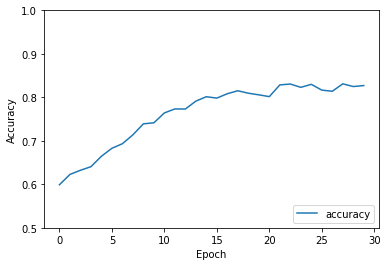

In [65]:
import matplotlib.pyplot as plt
#we plot the accuracy to epoch number
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [66]:
validation_loss, validation_acc = model.evaluate(X_val,  y_val, verbose=2)

19/19 - 0s - loss: 1.1902 - accuracy: 0.8013 - 380ms/epoch - 20ms/step


In [67]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

47/47 - 1s - loss: 1.4085 - accuracy: 0.7849 - 754ms/epoch - 16ms/step
